In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<Axes: xlabel='math score'>

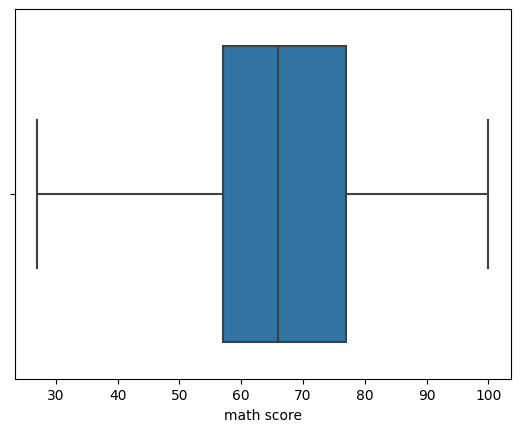

In [15]:
sns.boxplot(x=df["math score"])

In [5]:
Q1=df["math score"].quantile(0.25)
Q3=df["math score"].quantile(0.75)
IQR=Q3-Q1

lowerBound=Q1-1.5*IQR
upperBound=Q3+1.5*IQR


In [12]:
outliersIndices=np.where((df["math score"] > upperBound) | (df["math score"]<lowerBound))[0]

In [13]:
df=df.drop(index=outliersIndices,axis=0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [36]:
# z score
rs_zs=((df["reading score"]-df["reading score"].mean()))/df["reading score"].std()

In [37]:
rs_zsList=list(rs_zs)
z_indices=[]
for i in range(len(rs_zsList)):
    if ((rs_zsList[i]>2) or (rs_zsList[i]<-2)):
        z_indices.append(i)
z_indices
df2=df.drop(index=z_indices,axis=0)

<Axes: xlabel='reading score'>

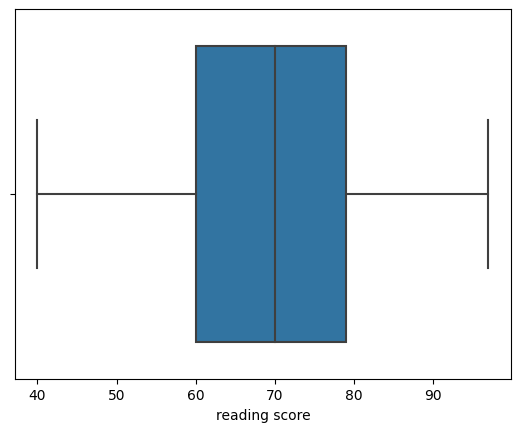

In [38]:
sns.boxplot(x=df2["reading score"])

In [50]:
minMaxNormScore=((df["writing score"]-df["writing score"].min())/(df["writing score"].max()-df["writing score"].min()))

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [45]:
#min max normalization
normalizedMathScore=(df["math score"]-df["math score"].min())/(df["math score"].max()-df["math score"].min())

<Axes: xlabel='writing score', ylabel='Count'>

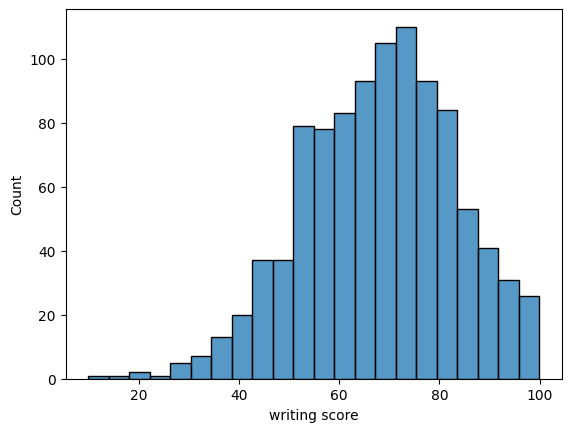

In [44]:
sns.histplot(x=minMaxNormScore)

<Axes: xlabel='math score', ylabel='Count'>

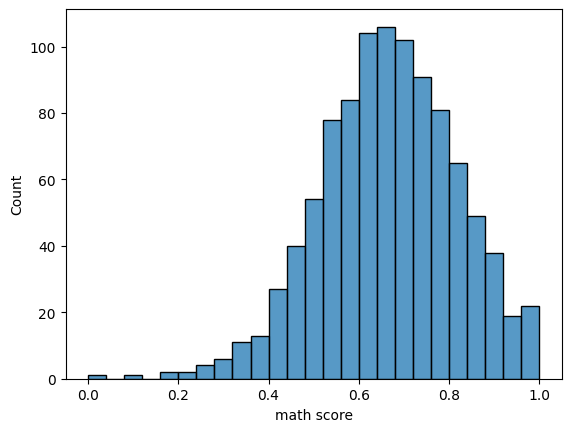

In [46]:
sns.histplot(x=normalizedMathScore)